In [3]:
%%latex
The total Gibbs free energy of the system is defined by $$ G = \int_{V} (g_{chem}(\phi) + g_{doub}(\phi) + g_{grad}(\nabla\phi)) dV $$ where, $g_{chem}$, $g_{doub}$, and $g_{grad}$ are the chemical free energy, the double-well potential energy and the gradient energy densities, respectively. In this source code, these energy densities are defined as follows: $$ g_{chem} = p(\phi)g_{B} + (1-p(\phi))g_{A} $$ $$ g_{doub} = Wq(\phi) $$ $$ g_{grad} = \frac{a^{2}}{2}|\nabla\phi|^{2} $$ where $g_{A}$ and $g_{B}$ are Gibbs free energy densities of pure phase A and pure phase B, respectively. Here, $g_{A}$ and $g_{B}$ are assumed to be constant.

$p(\phi)$ and $q(\phi)$ are an interpolation function and the double-well potential function. These functions are often defined as follows: $$ p(\phi) = \phi^{2}(3-2\phi) $$ $$ q(\phi) = \phi^{2}(1-\phi)^{2} $$

$W$ and $a$ are the height of double-well potential energy and the gradient energy coefficient, respectively, which are given by $$ W = \frac{6\sigma\delta}{b} $$ $$ a = \sqrt{\frac{3\sigma b}{\delta}} $$ where $\sigma$ is the interfacial energy of an interface between phase A and B. $\delta$ is the thickness (length in one-dimension) of the diffuse interface. $b$ is given as $b = 2\tanh^{-1}(1-2\lambda)$ where $\lambda$ is a constant which is used for determining the thickness of interfacial region. In this source code, we use $\lambda$ = 0.1 and then $b$ = 2.2.

<IPython.core.display.Latex object>

In [1]:
#http://web.tuat.ac.jp/~yamanaka/pcoms2019/Allen-Cahn-2d.html
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import math

In [25]:
nx, ny = 32, 32 # number of computational grids
dx, dy = 0.5e-6, 0.5e-6 # spacing of computational grid [m]
eee = 1.0e+6 # driving force of growth of phase B: g_A - g_B [J/m3]
sigma = 1.0 # ineterfacial energy [J/m2]
delta = 4.*dx # interfacial thickness [m]
amobi = 4.e-14 # interfacial mobilitiy [m4/(Js)]
ram = 0.1 # paraneter which deternines the interfacial area
bbb = 2.*np.log((1.+(1.-2.*ram))/(1.-(1.-2.*ram)))/2.  # The constant b = 2.1972

In [26]:
aaa   = np.sqrt(3.*delta*sigma/bbb) # gradient energy coefficient  "a"[(J/m)^(1/2)]
www   = 6.*sigma*bbb/delta # potential height W [J/m3]
pmobi = amobi*math.sqrt(2.*www)/(6.*aaa) # mobility of phase-field [m3/(Js)]

In [27]:
%%latex
$$ \phi^{t+\Delta t}{i,j} = \phi^{t}{i,j} + M{\phi} \left[ 4W\phi^{t}{i,j}\left(1-\phi^{t}{i,j}\right)\left(\phi^{t}{i,j}-\frac{1}{2}+\frac{3}{2W}(g{A}-g{B})\right) +a^{2}\left( \frac{\phi^{t}{i+1,j}-2\phi^{t}{i,j}+\phi^{t}_{i-1,j}}{(\Delta x)^{2}}

           + \frac{\phi^{t}_{i,j+1}-2\phi^{t}_{i,j}+\phi^{t}_{i,j-1}}{(\Delta y)^{2}}\right)

\right]\Delta t $$

<IPython.core.display.Latex object>

In [28]:
dt = dx*dx/(5.*pmobi*aaa*aaa)/2 # time increment for a time step [s]
nsteps = 10 # total number of time step

In [29]:
p  = np.zeros((nsteps,nx,ny)) # phase-field variable
x_coords = np.zeros((nsteps,nx,ny))
y_coords = np.zeros((nsteps, nx,ny))
t_coords = np.zeros((nsteps,nx,ny))
bulk_term = np.zeros((nsteps,nx,ny))
grad_term = np.zeros((nsteps,nx,ny))

In [30]:
r_nuclei = 15.*dx # radius of the initial B phase
for i in range(0,nx):
    for j in range(0,ny):
        r = np.sqrt( (i *dx)**2 +(j*dy)**2 ) - r_nuclei
        p[0,i,j] = 0.5*(1.-np.tanh(np.sqrt(2.*www)/(2.*aaa)*r))
        x_coords[0,i,j] = i*dx
        y_coords[0,i,j] = j*dy
        t_coords[0,i,j] = 0.

In [31]:
def do_timestep(p,x_coords,y_coords,t_coords):
    for t in range(nsteps-1):
        for j in range(ny):
            for i in range(nx):
                ip = i + 1
                im = i - 1
                jp = j + 1
                jm = j - 1
                if ip > nx - 1:
                    ip = nx -1
                if im < 0:
                    im = 0
                if jp > ny - 1:
                    jp = ny -1
                if jm < 0:
                    jm = 0
                p[t+1,i,j] = p[t,i,j] + pmobi * ( 4.*www*p[t,i,j]*(1.-p[t,i,j])*(p[t,i,j]-0.5+3./(2.*www)*eee)+  aaa*aaa*((p[t,ip,j] - 2*p[t,i,j] + p[t,im,j])/dx/dx + (p[t,i,jp] - 2*p[t,i,j] + p[t,i,jm])/dy/dy) ) * dt
                x_coords[t+1,i,j] = i*dx
                y_coords[t+1,i,j] = j*dy
                t_coords[t+1,i,j] = (t+1)*dt

In [32]:
u = p

In [33]:
u_t = np.gradient(u, dt, axis=0)
u_x = np.gradient(u, dx,axis=1)
u_xx = np.gradient(u_x,dx,axis=1)
u_y = np.gradient(u, dy,axis=2)
u_yy = np.gradient(u_y,dy,axis=2)

In [34]:
do_timestep(p,x_coords,y_coords,t_coords)

In [35]:
from sklearn.utils import shuffle

In [36]:
p_s = p.flatten()
x_s = x_coords.flatten()
y_s  = y_coords.flatten()
t_s = t_coords.flatten()
#p_s,x_s,y_s,t_s = shuffle(p_s,x_s,y_s,t_s,random_state=1001)

In [37]:
import pandas as pd

In [38]:
df = pd.DataFrame({'t':t_s,'x':x_s,'y':y_s,'u':p_s,})

In [39]:
df.to_csv('Allen_Cahn_from_scratch.csv',index=None)

<IPython.core.display.Javascript object>


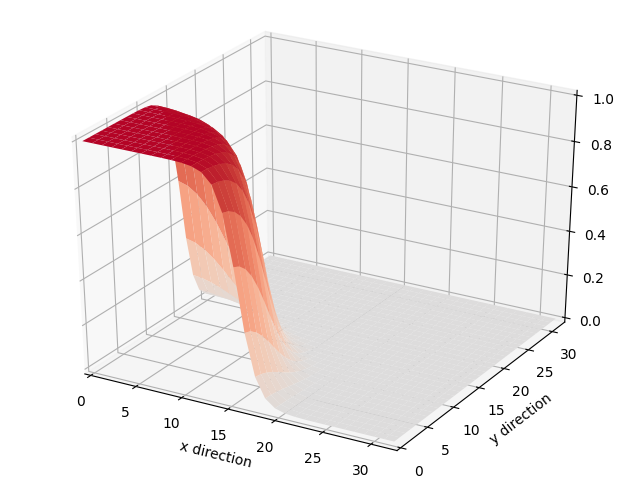

In [44]:
x = np.linspace(0, nx, nx)
y = np.linspace(0, ny, ny)
x, y = np.meshgrid(y, x)

fig = plt.figure()
fig.set_dpi(100)
ax = Axes3D(fig)

def animate(i):
    ax.clear()
    plt.ylim([0,ny])
    plt.xlim([0,nx])
    plt.xlabel('x direction')
    plt.ylabel('y direction')
    ax.plot_surface(x, y, p[i,:,:], rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=1,vmin=-1)
    ax.set_zlim(0, 1)
    
anim = animation.FuncAnimation(fig,animate,frames=nsteps-1,interval=10,repeat=False)
plt.show()